In [1]:
import numpy as np
from numpy import random
import math
import time
import matplotlib.pylab as plt

# **Preparation of Algorithms**

## _**Define individual sorting algorithms**_

In [2]:
def insertion_count(data, compObj):
    for i in range(1, len(data)):
        for j in range(i, 0, -1):
            compObj.increase()
            if data[j] < data[j-1]:
                data[j], data[j-1] = data[j-1], data[j]
            else:
                break
    return data

In [3]:
# MERGE SORT - w/ counting of no. of comparisons
def merge(sorted1, sorted2, compObj):
    list1 = sorted1
    list2 = sorted2
    i = j = 0
    newlist = []
    # comparisons = sorted1[1] + sorted2[1]
    
    while i < len(list1) and j < len(list2):
        compObj.increase()
        if list1[i] < list2[j]:
            newlist.append(list1[i])
            i += 1
        elif list1[i] > list2[j]:
            newlist.append(list2[j])
            j += 1
        else:
            newlist.append(list1[i])
            newlist.append(list2[j])
            i += 1
            j += 1

    if i < len(list1):
        newlist.extend(list1[i:])
    else:
        newlist.extend(list2[j:])

    return newlist
    
def merge_sort(data, compObj):
    # Base Case
    if len(data) == 1:
        return data, 0
    # Recursion
    elif len(data) > 1:
        mid = len(data)//2
        lower = data[:mid]
        upper = data[mid:]
        sorted1 = merge_sort(lower, compObj) #sorted 1 is a tuple (sorted lower list, number of comparisons for lower list)
        sorted2 = merge_sort(upper, compObj) #sorted 2 is a tuple (sorted upper list, number of comparisons for upper list)
        return merge(sorted1, sorted2, compObj)

## _**Class: Store Key Comparison across different functions**_

In [4]:
class KeyComp:
    """
    Class to store key comparisons
    """
    def __init__(self, comparisons=0):
        self.comparisons = comparisons
    
    def increase(self):
        self.comparisons += 1
    
    def get(self):
        return self.comparisons

## _**Function: Generate Random Dataset**_

In [5]:
def generate_data(size, upper_lim, lower_lim=0):
    """
    Generates array of integers of size 'size' in the range of [lower_lim, upper_lim)]

    Args:
        size: Size of array to be generated
        upper_lim: Upper limit of range
        lower_lim: Lower limit of range
    
    Returns:
        Generated array
    """
    
    return random.randint(low=lower_lim, high=upper_lim, size=size)

## _**Function: Time Taken + No. of Comparisons**_

In [6]:
def test_insertion(data, compObj):
    """
    Calculates number of comparisons and time taken by insertion sort to sort the given array

    Returns:
        insertion_comparisons: Number of comparisons made by insertion sort
        insertion_time: Time taken by insertion sort
    """

    start_time = time.time()
    _ = insertion_count(data, compObj)
    insertion_time = time.time() - start_time

    return compObj.get(), insertion_time

In [7]:
def test_merge(data, compObj):
    """
    Calculates number of comparisons and time taken by mergesort to sort the given array

    Returns:
        merge_comparisons: Number of comparisons made by merge sort
        merge_time: Time taken by merge sort
    """

    start_time = time.time()
    _ = merge_sort(data, compObj)
    merge_time = time.time() - start_time

    return compObj.get(), merge_time

Due to fluctuations caused by randomness of dataset, we should conduct multiple tests and obtain the average.

In [8]:
def insertion_merge_stats(iterations, all_sizes):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for insertion sort and merge sort for a range of sizes

    Args:
        iterations: Number of tests to be conducted for each size
        all_sizes: List of sizes to be tested

    Returns:
        insertion_comparison_array: Array of number of comparisons for each size for insertion sort
        insertion_time_array: Array of time taken for each size for insertion sort
        merge_comparison_array: Array of number of comparisons for each size for merge sort
        merge_time_array: Array of time taken for each size for merge
    """

    insertion_comparison_array = []
    insertion_time_array = []
    compInsert = KeyComp()
    merge_comparison_array = []
    merge_time_array = []
    compMerge = KeyComp()

    for i in range(len(all_sizes)):
        size = all_sizes[i]

        for iteration in range(iterations): # conduct multiple tests to get average
            input_array = generate_data(size=size, upper_lim=1000)
            insertion_comparisons, insertion_time = test_insertion(input_array, compInsert)
            merge_comparisons, merge_time = test_merge(input_array, compMerge)
    
            # i.e. each index in the arrays corresponds to a size
            if (iteration == 0):
                insertion_comparison_array.append(insertion_comparisons)
                insertion_time_array.append(insertion_time)
                merge_comparison_array.append(merge_comparisons)
                merge_time_array.append(merge_time)

            # i.e. each element in the arrays is the average of all iterations for that size   
            else:
                insertion_comparison_array[i] = (insertion_comparison_array[i] + insertion_comparisons) / 2
                insertion_time_array[i] = (insertion_time_array[i] + insertion_time) / 2
                merge_comparison_array[i] = (merge_comparison_array[i] + merge_comparisons) / 2
                merge_time_array[i] = (merge_time_array[i] + merge_time) / 2
    
    return insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array

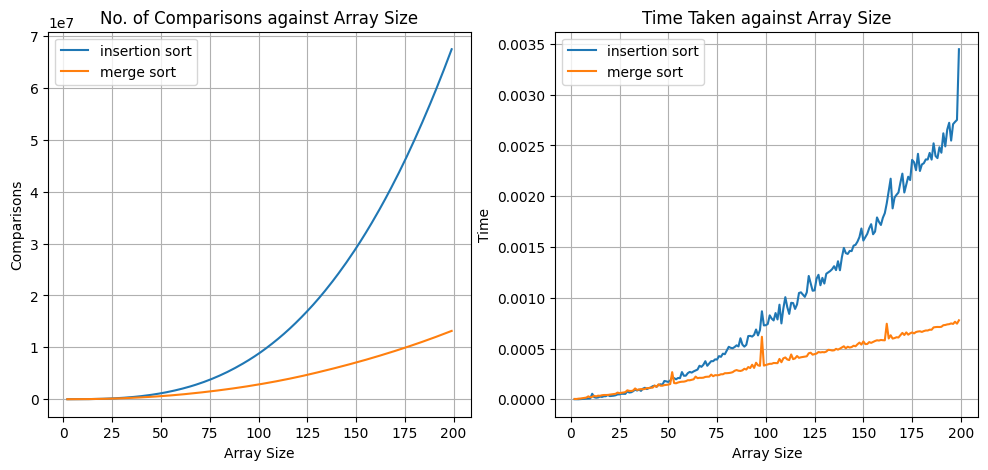

In [12]:
"""
    Plot insertion sort vs mergesort time and comparisons just for an easy visual representation of their efficiency
    -  size of array ranges from 2 to 100
    -  100 tests conducted for each size
"""

sizes = [i for i in range(2, 200)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(iterations=100, all_sizes=sizes)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)

axs[0].plot(sizes, insertion_comparison_array, label="insertion sort")
axs[0].plot(sizes, merge_comparison_array, label="merge sort")
axs[0].legend()
axs[0].set_title("No. of Comparisons against Array Size")
axs[0].set_xlabel("Array Size")
axs[0].set_ylabel("Comparisons")
axs[0].grid()

axs[1].plot(sizes, insertion_time_array, label = "insertion sort")
axs[1].plot(sizes, merge_time_array, label = "merge sort")
axs[1].legend()
axs[1].set_title("Time Taken against Array Size")
axs[1].set_xlabel("Array Size")
axs[1].set_ylabel("Time")
axs[1].grid()

---

# **Part a: Implementation of hybrid sorting algorithm**

In [31]:
# def hybrid_sort(data, S):
    # """
    # Hybrid sorting algorithm that combines insertion sort and mergesort:
    # Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
    # the algorithm will switch to Insertion Sort, which is efficient for small-sized input

    # Args:
    #     data: Array containing list of integers to be sorted
    #     S: Threshold value for switching to insertion sort
    
    # Returns:
    #     merge(sorted1, sorted2): Merged sorted list of the input data
    # """

#     # Base Case
#     if len(data) == 1:
#         return data, 0
    

#     elif len(data) > 1:
#         mid = len(data)//2
#         lower = data[:mid]
#         upper = data[mid:]

#         if (len(lower) <= S):
#             sorted1 = insertion_count(lower)
#         else:
#             sorted1 = hybrid_sort(lower, S) #sorted 1 is a tuple (sorted lower list, number of comparisons for lower list)

#         if (len(upper) <= S):
#             sorted2 = insertion_count(upper)
#         else:
#             sorted2 = hybrid_sort(upper, S) #sorted 2 is a tuple (sorted upper list, number of comparisons for upper list)

#         return merge(sorted1, sorted2)


def hybrid_sort(data, S, compObj):
    """
    Hybrid sorting algorithm that combines insertion sort and mergesort:
    Once the size of a subarray in a recursive call of Mergesort is less than or equal to S,
    the algorithm will switch to Insertion Sort, which is efficient for small-sized input

    Args:
        data: Array containing list of integers to be sorted
        S: Threshold value for switching to insertion sort
    
    Returns:
        merge(sorted1, sorted2): Merged sorted list of the input data
    """

    # Base Case
    if len(data) == 1:
        return data

    if len(data) <= S:
        return insertion_count(data, compObj)
    
    mid = len(data) // 2
    lower = data[:mid]
    upper = data[mid:]
    sorted1 = hybrid_sort(lower, S, compObj)
    sorted2 = hybrid_sort(upper, S, compObj)
    return merge(sorted1, sorted2, compObj)

In [32]:
def test_hybrid(data, S, compObj):
    """
    Calculates number of comparisons and time taken by hybrid sort to sort the given array

    Returns:
        insertion_comparisons: Number of comparisons made by hybrid sort
        insertion_time: Time taken by hybrid sort
    """

    start_time = time.time()
    _ = hybrid_sort(data, S, compObj)
    hybrid_time = time.time() - start_time
    
    return compObj.get(), hybrid_time

# **Part c: Analyse Time Complexity** 

In [33]:
def hybrid_stats_size(iterations, all_sizes, S):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for hybrid sort for a range of sizes

    Args:
        iterations: Number of tests to be conducted for each size
        all_sizes: List of sizes to be tested
        S: Threshold value for switching to insertion sort

    Returns:
        hybrid_comparison_array: Array of number of comparisons for each size for hybrid sort
        hybrid_time_array: Array of time taken for each size for hybrid sort
    """

    hybrid_comparison_array = []
    hybrid_time_array = []
    compHybrid = KeyComp()

    for i in range(len(all_sizes)): # test for each size
        size = all_sizes[i]

        for iteration in range(iterations): # conduct multiple tests to get average
            input_array = generate_data(size=size, upper_lim=1000)
            hybrid_comparisons, hybrid_time = test_hybrid(input_array, S, compHybrid)
 
            # i.e. each index in the arrays corresponds to a size
            if iteration == 0:
                hybrid_comparison_array.append(hybrid_comparisons)
                hybrid_time_array.append(hybrid_time)

            # i.e. each element in the arrays is the average of all iterations for that size   
            else:
                hybrid_comparison_array[i] = (hybrid_comparison_array[i] + hybrid_comparisons) // 2
                hybrid_time_array[i] = (hybrid_time_array[i] + hybrid_time) / 2

        print(f"Size: {size}")
        print(f"Number of comparisons: {hybrid_comparisons}")
        print(f"Time taken: {hybrid_time}\n")
    
    return hybrid_comparison_array, hybrid_time_array

In [34]:
def hybrid_stats_S(iterations, size, all_S):
    """
    Retrieves statistics (i.e. number of comparisons and time taken) for hybrid sort for a range of S values

    Args:
        iterations: Number of tests to be conducted for each size
        size: Size of array to be sorted
        all_S: List of S values to be tested

    Returns:
        hybrid_comparison_array: Array of number of comparisons for each size for hybrid sort
        hybrid_time_array: Array of time taken for each size for hybrid sort
    """

    hybrid_comparison_array = []
    hybrid_time_array = []
    compHybrid = KeyComp()

    for i in range(len(all_S)): # test for each size
        S = all_S[i]

        for iteration in range(iterations): # conduct multiple tests to get average
            input_array = generate_data(size=size, upper_lim=1000)
            hybrid_comparisons, hybrid_time = test_hybrid(input_array, S, compHybrid)
 
            # i.e. each index in the arrays corresponds to a size
            if iteration == 0:
                hybrid_comparison_array.append(hybrid_comparisons)
                hybrid_time_array.append(hybrid_time)

            # i.e. each element in the arrays is the average of all iterations for that size   
            else:
                hybrid_comparison_array[i] = (hybrid_comparison_array[i] + hybrid_comparisons) // 2
                hybrid_time_array[i] = (hybrid_time_array[i] + hybrid_time) / 2

        print(f"S = {S}")
        print(f"Number of comparisons: {hybrid_comparisons}")
        print(f"Time taken: {hybrid_time}\n")
    
    return hybrid_comparison_array, hybrid_time_array

## _**c(i): Fixed value of S**_
Fixed <u>S = 20</u>, varying list size. Only each power of 10 interval from 1000 to 10 million is plotted.

Size: 1000
Number of comparisons: 49788
Time taken: 0.0042438507080078125

Size: 10000
Number of comparisons: 695805
Time taken: 0.025701045989990234

Size: 100000
Number of comparisons: 7462694
Time taken: 0.24721312522888184

Size: 1000000
Number of comparisons: 86327069
Time taken: 3.098583698272705

Size: 10000000
Number of comparisons: 993346128
Time taken: 34.71687412261963



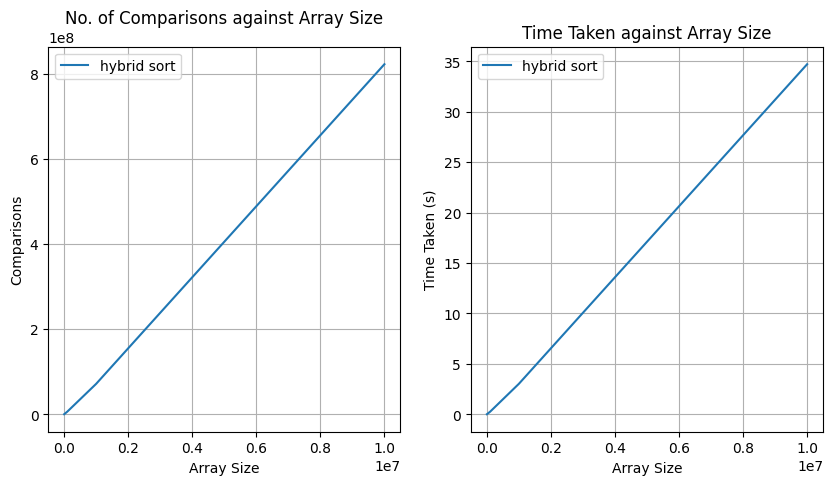

In [35]:
"""
    Plot change in no. of comparisons and time taken with a fixed value of S
    -  array size ranges from 1000 to 10 million (each power of 10 only)
    -  5 tests conducted for each size
"""

fixed_S = 20
hybrid_sizes = [int(1000 * math.pow(10, i)) for i in range(5)] # array sizes range from 1000 to 10 million

hybrid1_comparison_array, hybrid1_time_array = hybrid_stats_size(iterations=5, all_sizes=hybrid_sizes, S=fixed_S)

# Plot
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

axs[0].plot(hybrid_sizes, hybrid1_comparison_array, label="hybrid sort")
axs[0].legend()
axs[0].set_title("No. of Comparisons against Array Size")
axs[0].set_xlabel("Array Size")
axs[0].set_ylabel("Comparisons")
axs[0].grid()

axs[1].plot(hybrid_sizes, hybrid1_time_array, label="hybrid sort")
axs[1].legend()
axs[1].set_title("Time Taken against Array Size")
axs[1].set_xlabel("Array Size")
axs[1].set_ylabel("Time Taken (s)")
axs[1].grid()

## _**c(ii): Fixed value of list size**_
Fixed <u>size = 100000</u>, varying S. Comparisons and time taken for each value of S in [2,100] is plotted

S = 2
Number of comparisons: 6252450
Time taken: 0.21526885032653809

S = 3
Number of comparisons: 12505466
Time taken: 0.21144509315490723

S = 4
Number of comparisons: 18760784
Time taken: 0.2091689109802246

S = 5
Number of comparisons: 25013888
Time taken: 0.20883679389953613

S = 6
Number of comparisons: 31357111
Time taken: 0.21506094932556152

S = 7
Number of comparisons: 37718680
Time taken: 0.21473002433776855

S = 8
Number of comparisons: 44080479
Time taken: 0.2162339687347412

S = 9
Number of comparisons: 50442484
Time taken: 0.2147073745727539

S = 10
Number of comparisons: 56802432
Time taken: 0.21527886390686035

S = 11
Number of comparisons: 63162816
Time taken: 0.21479487419128418

S = 12
Number of comparisons: 69831386
Time taken: 0.23830509185791016

S = 13
Number of comparisons: 76600133
Time taken: 0.24520587921142578

S = 14
Number of comparisons: 83366751
Time taken: 0.24492907524108887

S = 15
Number of comparisons: 90137789
Time taken: 0.24535298347473145

S = 

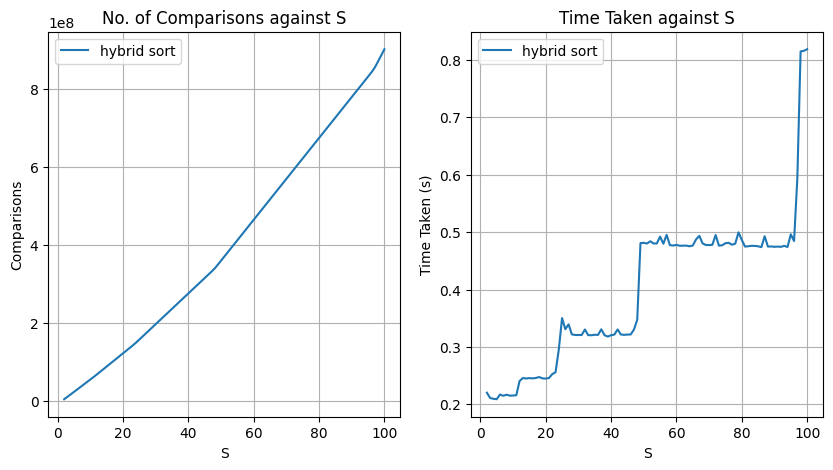

In [36]:
"""
    Plot change in no. of comparisons and time taken using hybrid sort with varying values of S
    -  array size fixed at 100k
    -  S ranges from 2 to 100
    -  5 tests conducted for each size
"""

fixed_size = 100000
S_array = [i for i in range(2, 101)]

hybrid2_comparison_array, hybrid2_time_array = hybrid_stats_S(5, fixed_size, S_array)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].plot(S_array, hybrid2_comparison_array, label="hybrid sort")
axs[0].legend()
axs[0].set_title("No. of Comparisons against S")
axs[0].set_xlabel("S")
axs[0].set_ylabel("Comparisons")
axs[0].grid()
axs[1].plot(S_array, hybrid2_time_array, label="hybrid sort")
axs[1].legend()
axs[1].set_title("Time Taken against S")
axs[1].set_xlabel("S")
axs[1].set_ylabel("Time Taken (s)")
axs[1].grid()

## _**c(iii): Optimal Value of S**_
The purpose of a hybrid sorting algorithm is to get the best of both worlds with insertion sort and mergesort. 

Although the time complexity of mergesort is generally better than insertion sort, insertion sort has better performance with smaller input array sizes. This is the appeal of the hybrid sorting algorithm over mergesort alone. 

Thus, finding the optimal value of S can be essentially to find the <u>array size at which insertion sort begins to perform more poorly than mergesort</u>. This can be found by plotting the performance of insertion sort and mergesort and finding the intersection point. 
 

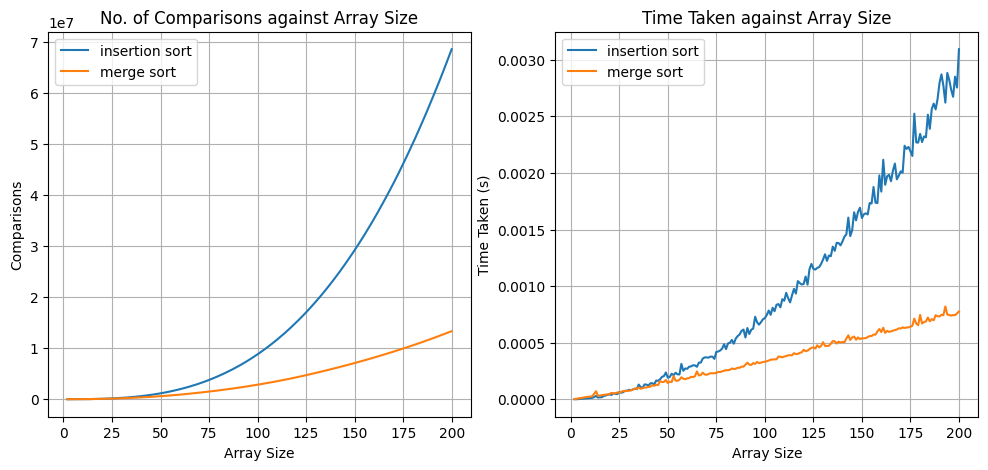

In [37]:
"""
    Plot change in no. of comparisons and time taken using insertion sort and mergesort with varying array size
    -  array size ranges from [2, 200]
    -  100 tests conducted for each size
"""

all_sizes = [i for i in range(2, 201)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(100, all_sizes)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axs[0].plot(all_sizes, insertion_comparison_array, label = "insertion sort")
axs[0].plot(all_sizes, merge_comparison_array, label = "merge sort")
axs[0].legend()
axs[0].set_title("No. of Comparisons against Array Size")
axs[0].set_xlabel("Array Size")
axs[0].set_ylabel("Comparisons")
axs[0].grid()
axs[1].plot(all_sizes, insertion_time_array, label = "insertion sort")
axs[1].plot(all_sizes, merge_time_array, label = "merge sort")
axs[1].legend()
axs[1].set_title("Time Taken against Array Size")
axs[1].set_xlabel("Array Size")
axs[1].set_ylabel("Time Taken (s)")
axs[1].grid()

Since the intersection point clearly occurs at a very low value of S, we will replot the graphs using a much smaller range of array sizes

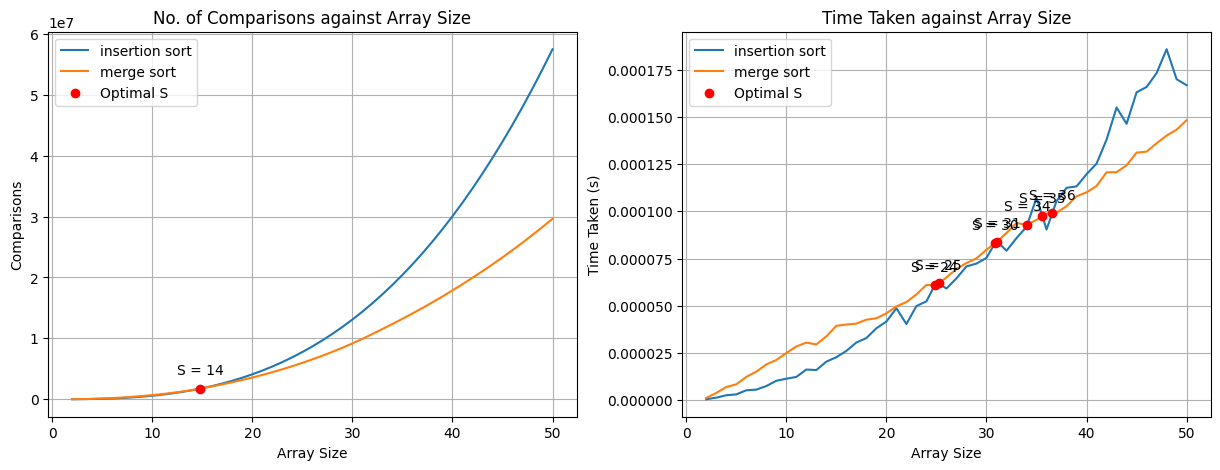

In [55]:
"""
    Plot change in no. of comparisons and time taken using insertion sort and mergesort with varying array size
    -  array size ranges from [2, 50]
    -  5000 tests conducted for each size
    -  last intersect between two lines marked for each graph
"""

all_sizes = [i for i in range(2, 51)]
insertion_comparison_array, insertion_time_array, merge_comparison_array, merge_time_array = insertion_merge_stats(5000, all_sizes)

# Convert lists to NumPy arrays
all_sizes = np.array(all_sizes)
insertion_time_array = np.array(insertion_time_array)
merge_time_array = np.array(merge_time_array)
insertion_comparison_array = np.array(insertion_comparison_array)
merge_comparison_array = np.array(merge_comparison_array)

# Find intersection points
diffTime = insertion_time_array - merge_time_array
sign_changeT = np.where(np.diff(np.sign(diffTime)))[0]  # indices where sign changes
diffComp = insertion_comparison_array - merge_comparison_array
sign_changeC = np.where(np.diff(np.sign(diffComp)))[0]  # indices where sign changes

intersect_time = []
for i in sign_changeT:
    # Linear interpolation to approximate intersection
    x1, x2 = all_sizes[i], all_sizes[i + 1]
    y1, y2 = insertion_time_array[i], insertion_time_array[i + 1]
    y3, y4 = merge_time_array[i], merge_time_array[i + 1]

    # Solve for x where the two line segments intersect
    x_intersect = x1 + (x2 - x1) * (y1 - y3) / ((y1 - y3) - (y2 - y4))
    y_intersect = np.interp(x_intersect, [x1, x2], [y1, y2])

    intersect_time.append([x_intersect, y_intersect])

intersect_cmp = []
for i in sign_changeC:
    # Linear interpolation to approximate intersection
    x1, x2 = all_sizes[i], all_sizes[i + 1]
    y1, y2 = insertion_comparison_array[i], insertion_comparison_array[i + 1]
    y3, y4 = merge_comparison_array[i], merge_comparison_array[i + 1]

    # Solve for x where the two line segments intersect
    x_intersect = x1 + (x2 - x1) * (y1 - y3) / ((y1 - y3) - (y2 - y4))
    y_intersect = np.interp(x_intersect, [x1, x2], [y1, y2])

    intersect_cmp.append([x_intersect, y_intersect])

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
axs[0].plot(all_sizes, insertion_comparison_array, label = "insertion sort")
axs[0].plot(all_sizes, merge_comparison_array, label = "merge sort")
# for cmpX, cmpY in intersect_cmp:
cmpX, cmpY = intersect_cmp[-1]
axs[0].scatter(cmpX, cmpY, color='red', zorder=3, label="Optimal S")
axs[0].annotate(f"S = {int(cmpX)}", (cmpX, cmpY),
                textcoords="offset points", xytext=(0,10), ha='center')

axs[0].legend()
axs[0].set_title("No. of Comparisons against Array Size")
axs[0].set_xlabel("Array Size")
axs[0].set_ylabel("Comparisons")
axs[0].grid()

axs[1].plot(all_sizes, insertion_time_array, label = "insertion sort")
axs[1].plot(all_sizes, merge_time_array, label = "merge sort")
for timeX, timeY in intersect_time:
# timeX, timeY = intersect_time[-1]
    axs[1].scatter(timeX, timeY, color='red', zorder=3, label="Optimal S")
    axs[1].annotate(f"S = {int(timeX)}", (timeX, timeY),
                    textcoords="offset points", xytext=(0,10), ha='center')
handles, labels = axs[1].get_legend_handles_labels()  
lgd = dict(zip(labels, handles))
axs[1].legend(lgd.values(), lgd.keys())
axs[1].set_title("Time Taken against Array Size")
axs[1].set_xlabel("Array Size")
axs[1].set_ylabel("Time Taken (s)")
axs[1].grid()

# **Part d: Compare with Original Mergesort**
From part c(iii), <u>S = 36</u> is the optimal value of S. We will now compare hybrid sort with S = 36 against normal mergesort

In [46]:
cmp_size = int(math.pow(10, 7)) # array of size 10 million
# cmp_size = 100
S = 36
compHybrid = KeyComp()
compMerge = KeyComp()

for i in range(5):
    input_array = generate_data(size=cmp_size, upper_lim=1000)
    if i == 0:
        hybrid_comparisons, hybrid_time = test_hybrid(input_array, S, compHybrid)
        merge_comparisons, merge_time = test_merge(input_array, compMerge)
    else:
        hc, ht = test_hybrid(input_array, S, compHybrid)
        mc, mt = test_merge(input_array, compMerge)
        hybrid_comparisons, hybrid_time = (hybrid_comparisons + hc) // 2, (hybrid_time + ht) / 2
        merge_comparisons, merge_time = (merge_comparisons + mc) // 2, (merge_time + mt) / 2
    
    print(f"Iteration {i+1} done")

Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done


Hybrid Sort Comparisons: 736933023
Merge Sort Comparisons: 1306643554
Hybrid Sort Time: 34.8857604265213
Merge Sort Time: 203.11737698316574


Text(0, 0.5, 'Time Taken (s)')

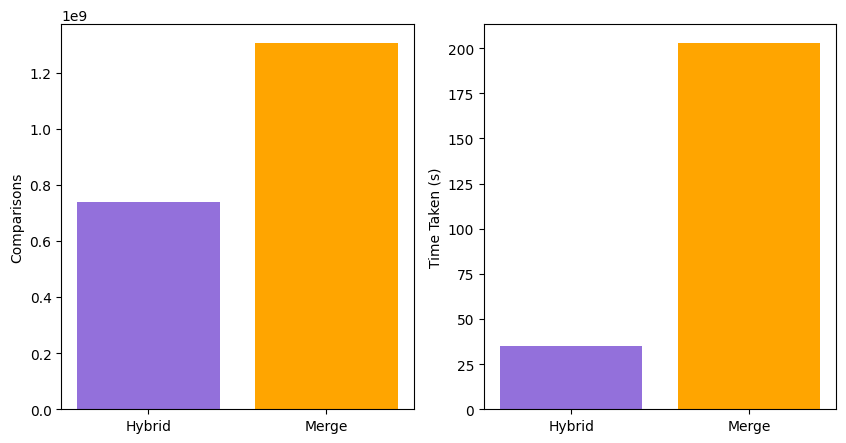

In [47]:
print(f"Hybrid Sort Comparisons: {hybrid_comparisons}")
print(f"Merge Sort Comparisons: {merge_comparisons}")
print(f"Hybrid Sort Time: {hybrid_time}")
print(f"Merge Sort Time: {merge_time}")

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].bar(["Hybrid", "Merge"], [hybrid_comparisons, merge_comparisons], color=['mediumpurple', 'orange'])
axs[0].set_ylabel("Comparisons")
axs[1].bar(["Hybrid", "Merge"], [hybrid_time, merge_time], color=['mediumpurple', 'orange'])
axs[1].set_ylabel("Time Taken (s)")

Use S = 14 instead

In [44]:
cmp_size = int(math.pow(10, 7)) # array of size 10 million
S = 14
compHybrid = KeyComp()
compMerge = KeyComp()

for i in range(5):
    input_array = generate_data(size=cmp_size, upper_lim=1000)
    if i == 0:
        hybrid_comparisons0, hybrid_time0 = test_hybrid(input_array, S, compHybrid)
        merge_comparisons0, merge_time0 = test_merge(input_array, compMerge)
    else:
        hc, ht = test_hybrid(input_array, S, compHybrid)
        mc, mt = test_merge(input_array, compMerge)
        hybrid_comparisons0, hybrid_time0 = (hybrid_comparisons0 + hc) // 2, (hybrid_time0 + ht) / 2
        merge_comparisons0, merge_time0 = (merge_comparisons0 + mc) // 2, (merge_time0 + mt) / 2
    
    print(f"Iteration {i+1} done")

Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done


Hybrid Sort Comparisons: 672281370
Merge Sort Comparisons: 1341245837
Hybrid Sort Time: 29.88333536684513
Merge Sort Time: 209.5892228782177


Text(0, 0.5, 'Time Taken (s)')

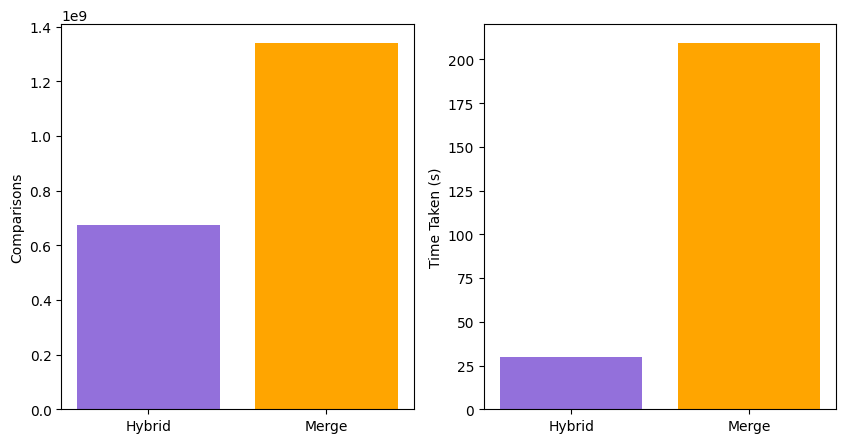

In [45]:
print(f"Hybrid Sort Comparisons: {hybrid_comparisons0}")
print(f"Merge Sort Comparisons: {merge_comparisons0}")
print(f"Hybrid Sort Time: {hybrid_time0}")
print(f"Merge Sort Time: {merge_time0}")

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
axs[0].bar(["Hybrid", "Merge"], [hybrid_comparisons0, merge_comparisons0], color=['mediumpurple', 'orange'])
axs[0].set_ylabel("Comparisons")
axs[1].bar(["Hybrid", "Merge"], [hybrid_time0, merge_time0], color=['mediumpurple', 'orange'])
axs[1].set_ylabel("Time Taken (s)")